# <font color = yellow> Expanded Kenya: all dataset features

In [1]:
# List all installed R libraries
installed_libraries <- installed.packages()

# Print the names of the installed libraries
t(installed_libraries[, "Package"])


abind,archive,askpass,assertthat,automl,backports,base64enc,BBmisc,BH,bit,⋯,rpart,spatial,splines,stats,stats4,survival,tcltk,tools,translations,utils
abind,archive,askpass,assertthat,automl,backports,base64enc,BBmisc,BH,bit,⋯,rpart,spatial,splines,stats,stats4,survival,tcltk,tools,translations,utils


In [2]:
# Load necessary libraries

library(readr)
library(dplyr)
library(kaggler)
library(reticulate)
library(ggplot2)
library(gridExtra)


# library(rle)   # Run Length Encoding: base rle( ) fct

options(scipen = 999)
#     Load the datasets w/ powershell:

#  kaggle competitions download -c playground-series-s5e1 -p 'C:/all_kaggle/jan25/dataset'
# $basePath = "C:\all_kaggle\jan25\dataset"
# $zipFilePath = Join-Path $basePath "playground-series-s5e1.zip"
# $trainFolderPath = Join-Path $basePath "train"
# $testFolderPath = Join-Path $basePath "test"
# $submissionFolderPath = Join-Path $basePath "submission"
#     # Unzip the file
# Expand-Archive -Path $zipFilePath -DestinationPath $basePath
#     # Move the CSV files to their respective subfolders
# Move-Item -Path (Join-Path $basePath "train.csv") -Destination $trainFolderPath
# Move-Item -Path (Join-Path $basePath "test.csv") -Destination $testFolderPath


Warning message:
"package 'readr' was built under R version 4.3.3"
Warning message:
"package 'dplyr' was built under R version 4.3.2"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'reticulate' was built under R version 4.3.3"
Warning message:
"package 'ggplot2' was built under R version 4.3.3"

Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine




### <font color = yellow> Get the kaggle, training dataset

In [3]:
vignette("dplyr")
vignette("dplyr")

starting httpd help server ...
 done



In [4]:
# Load the datasets with the correct path
train <- read_csv('C:/all_kaggle/jan25/dataset/train/train.csv', show_col_types = FALSE)
# test <- read_csv('C:/all_kaggle/jan25/dataset/test/test.csv', show_col_types = FALSE)
dim(train)
head(train,2)
# dim(test)

[1] 230130      6

id,date,country,store,product,num_sold
<dbl>,<date>,<chr>,<chr>,<chr>,<dbl>
0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NA
1,2010-01-01,Canada,Discount Stickers,Kaggle,973


# <font color = lime> Functions Section:

### <font color = yellow> Fct: Preliminary dfs: year_2010, 2011, 2012, etc...

In [5]:
# Filter the data for the specified year within the function
get_filtered_year <- function(df, year) {
  filtered_data <- df %>% filter(year == !!year)
  return(filtered_data)
}

# Initialize the vector of years
yr <- c(2010, 2011, 2012, 2013, 2014, 2015, 2016)

# Loop through each year and create separate dataframes
for (i in 1:length(yr)) {
  filtered_data <- get_filtered_year(train, yr[i])
  var_name <- paste0("year_", yr[i])
  assign(var_name, filtered_data)
}

# Display the content of the dynamically created dataframes
dim(year_2010)
dim(year_2011)


[1] 230130      6

[1] 230130      6

### <font color = lime> Grouping / Plotting Monthly Sales:

In [6]:
# Assuming your dataframe is named year_2010
# Group by month and calculate total sales for each month
monthly_group_by <- function(df) {
    
    monthly_sales <- df %>%
      group_by(mo) %>%
      summarise(total_sales = sum(num_sold, na.rm = TRUE))
    
    # Display the prepared data
    # print(monthly_sales)
    return(monthly_sales)    
}  

In [7]:
    # Create the histogram plot
histogram_monthly_plot <- function(df) {

    plot <- ggplot(monthly_sales, aes(x = mo, y = total_sales, fill = mo)) +
      geom_bar(stat = "identity") +
      labs(title = "Total Sales by Month for the Year 2010",
           x = "Month",
           y = "Total Sales") +
      theme_minimal() +
      scale_fill_brewer(palette = "Paired")

    # Print the plot 
    print(plot)
    }
      

In [8]:
library(dplyr)

country_sales_and_na_mo <- function(df, country_name) {
    
    # Filter the dataframe for the specified country and non-NA num_sold values
    filtered_country_na <- df %>%
      filter(country == !!country_name)
    
    # Display the filtered data (optional)
    print(head(filtered_country_na, 1))
    
    # Summarize the count of NA values per month
    count_na_per_month <- function(df) {
      df %>%
        group_by(mo) %>%
        summarise(count_na = sum(is.na(num_sold)))
    }
    
    # Apply the function to the entire dataframe to get NA counts
    test_sum_na <- count_na_per_month(df)
    
    # Summarize total sales per month for the filtered country
    total_sales_per_month <- function(df) {
      df %>%
        group_by(mo) %>%
        summarise(total_sales = sum(num_sold, na.rm = TRUE))
    }
    
    # Apply the function to the filtered data
    test_mo_na <- total_sales_per_month(filtered_country_na)
    
    # Perform a full join to combine count of NAs and total sales per month
    final_df <- full_join(test_sum_na, test_mo_na, by = "mo")
    
    # Return the final dataframe
    return(final_df)
}



In [9]:
# head(country_sales_and_na_mo(year_2010, "Kenya"), 2)

In [10]:


product_sales_and_na_mo <- function(df, product_name) {
    
    # Filter the dataframe for the specified product and non-NA num_sold values
    filtered_product_na <- df %>%
      filter(product == !!product_name & !is.na(num_sold))
    
    # Display the filtered data (optional)
    print(head(filtered_product_na, 1))
    
    # Summarize the count of NA values per month
    count_na_per_month <- function(df) {
      df %>%
        group_by(mo) %>%
        summarise(count_na = sum(is.na(num_sold)))
    }
    
    # Apply the function to the entire dataframe to get NA counts
    test_sum_na <- count_na_per_month(df)
    
    # Summarize total sales per month for the filtered product
    total_sales_per_month <- function(df) {
      df %>%
        group_by(mo) %>%
        summarise(total_sales = sum(num_sold, na.rm = TRUE))
    }
    
    # Apply the function to the filtered data  (GS: missed this part) 
    test_mo_na <- total_sales_per_month(filtered_product_na)
    
    # Perform a full join to combine count of NAs and total sales per month
    final_df <- full_join(test_sum_na, test_mo_na, by = "mo")
    
    # Return the final dataframe
    return(final_df)
}

In [11]:
# head(product_sales_and_na_mo(year_2010, "Holographic Goose"), 3)

### <font color = lime> The Pattern:  Each Country(1:6) > Each store(1:3) > Each product (1:5) = 90 row cycles

#### 1-1-5/ 1-1-5 / 1-1-5 (1 country/ each store / each product  { for each day => 90 rows }

### <font color = yellow> Cursory Evaluations for NAs - only found.: num_sold ... cat response feature

In [12]:
glimpse(train)
summary(train)

Rows: 230,130
Columns: 6
$ id       <dbl> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,…
$ date     <date> 2010-01-01, 2010-01-01, 2010-01-01, 2010-01-01, 2010-01-01, …
$ country  <chr> "Canada", "Canada", "Canada", "Canada", "Canada", "Canada", "…
$ store    <chr> "Discount Stickers", "Discount Stickers", "Discount Stickers"…
$ product  <chr> "Holographic Goose", "Kaggle", "Kaggle Tiers", "Kerneler", "K…
$ num_sold <dbl> NA, 973, 906, 423, 491, 300, 1837, 1659, 807, 940, 375, 2212,…


       id              date              country             store          
 Min.   :     0   Min.   :2010-01-01   Length:230130      Length:230130     
 1st Qu.: 57532   1st Qu.:2011-10-02   Class :character   Class :character  
 Median :115065   Median :2013-07-02   Mode  :character   Mode  :character  
 Mean   :115065   Mean   :2013-07-02                                        
 3rd Qu.:172597   3rd Qu.:2015-04-02                                        
 Max.   :230129   Max.   :2016-12-31                                        
                                                                            
   product             num_sold     
 Length:230130      Min.   :   5.0  
 Class :character   1st Qu.: 219.0  
 Mode  :character   Median : 605.0  
                    Mean   : 752.5  
                    3rd Qu.:1114.0  
                    Max.   :5939.0  
                    NA's   :8871    

### <font color = yellow> Expand the date to (year, month, day)

In [13]:
head(train,1)

id,date,country,store,product,num_sold
<dbl>,<date>,<chr>,<chr>,<chr>,<dbl>
0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NA


In [14]:
library(lubridate)
# vignette("lubridate")
# vignette("lubridate")

Warning message:
"package 'lubridate' was built under R version 4.3.3"

Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union




## <font color = yellow> Add: year, mo, day, wkday variables

In [15]:
train <- train %>% mutate(year = year(date), mo = month(date , label = TRUE), day = day(date), wkday = wday(date, label = TRUE ) )
tail(train, 2)

id,date,country,store,product,num_sold,year,mo,day,wkday
<dbl>,<date>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<ord>,<int>,<ord>
230128,2016-12-31,Singapore,Premium Sticker Mart,Kerneler,1242,2016,Dec,31,Sat
230129,2016-12-31,Singapore,Premium Sticker Mart,Kerneler Dark Mode,1622,2016,Dec,31,Sat


# <font color = yellow> Create date arrays: Month / Year

### <font color = yellow> month_list$mo 

In [16]:
# Generate a sequence of 12 months from January to December
months_array <- format(seq.Date(from = as.Date("2010-01-01"), to = as.Date("2010-12-01"), by = "month"), "%b")
#print(months_array)

# Generate an array to store the filtered data  (ALL Years)
month_list <- list()

# Loop through each month and filter the dataframe
for (month in months_array) {
  filtered_data <- train %>%
    filter(month(date, label = TRUE) == month & year(date) == 2010)
  month_list[[month]] <- filtered_data
}

tail(month_list$Jan)


id,date,country,store,product,num_sold,year,mo,day,wkday
<dbl>,<date>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<ord>,<int>,<ord>
2784,2010-01-31,Singapore,Stickers for Less,Kerneler Dark Mode,940,2010,Jan,31,Sun
2785,2010-01-31,Singapore,Premium Sticker Mart,Holographic Goose,305,2010,Jan,31,Sun
2786,2010-01-31,Singapore,Premium Sticker Mart,Kaggle,1700,2010,Jan,31,Sun
2787,2010-01-31,Singapore,Premium Sticker Mart,Kaggle Tiers,1537,2010,Jan,31,Sun
2788,2010-01-31,Singapore,Premium Sticker Mart,Kerneler,741,2010,Jan,31,Sun
2789,2010-01-31,Singapore,Premium Sticker Mart,Kerneler Dark Mode,1054,2010,Jan,31,Sun


### <font color = yellow> filtered_year_20xx 

In [17]:
# Create array w/range of years
years_array <- seq(2010, 2016, by = 1)

# Generate an array to store the filtered data
year_list <- list()

# Loop through each year and filter the dataframe
for (year in years_array) {
  filtered_data <- train %>%
    filter(year == !!year)  # Use the correct variable inside the filter
  year_list[[as.character(year)]] <- filtered_data
}

# Function to return filtered data for a specific year
get_filtered_year <- function(year) {
  year_list[[as.character(year)]]
}

# Example: Accessing the dataframe for the year 2011
filtered_year_2011 <- get_filtered_year(2011)
print(dim(filtered_year_2011))
print(tail(filtered_year_2011, 10))

# Example: Accessing the dataframe for the year 2012
filtered_year_2012 <- get_filtered_year(2012)
print(dim(filtered_year_2012))
print(head(filtered_year_2012, 10))


[1] 32850    10
# A tibble: 10 × 10
      id date       country   store     product num_sold  year mo      day wkday
   <dbl> <date>     <chr>     <chr>     <chr>      <dbl> <dbl> <ord> <int> <ord>
 1 65690 2011-12-31 Singapore Stickers… Hologr…      351  2011 Dec      31 Sat  
 2 65691 2011-12-31 Singapore Stickers… Kaggle      2017  2011 Dec      31 Sat  
 3 65692 2011-12-31 Singapore Stickers… Kaggle…     1870  2011 Dec      31 Sat  
 4 65693 2011-12-31 Singapore Stickers… Kernel…      977  2011 Dec      31 Sat  
 5 65694 2011-12-31 Singapore Stickers… Kernel…     1231  2011 Dec      31 Sat  
 6 65695 2011-12-31 Singapore Premium … Hologr…      384  2011 Dec      31 Sat  
 7 65696 2011-12-31 Singapore Premium … Kaggle      2668  2011 Dec      31 Sat  
 8 65697 2011-12-31 Singapore Premium … Kaggle…     2520  2011 Dec      31 Sat  
 9 65698 2011-12-31 Singapore Premium … Kernel…     1146  2011 Dec      31 Sat  
10 65699 2011-12-31 Singapore Premium … Kernel…     1497  2011 Dec      3

## <font color = yellow> Primary Cycle: 6 countries repeat in 90 row cycles

In [18]:
head(train[1:92,],2)
tail(train[1:92, ], 3)  # beginning of repeated cycle on Jan 2

id,date,country,store,product,num_sold,year,mo,day,wkday
<dbl>,<date>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<ord>,<int>,<ord>
0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NA,2010,Jan,1,Fri
1,2010-01-01,Canada,Discount Stickers,Kaggle,973,2010,Jan,1,Fri


id,date,country,store,product,num_sold,year,mo,day,wkday
<dbl>,<date>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<ord>,<int>,<ord>
89,2010-01-01,Singapore,Premium Sticker Mart,Kerneler Dark Mode,1255,2010,Jan,1,Fri
90,2010-01-02,Canada,Discount Stickers,Holographic Goose,NA,2010,Jan,2,Sat
91,2010-01-02,Canada,Discount Stickers,Kaggle,881,2010,Jan,2,Sat


### <font color = yellow> Create reference dfs:

In [19]:
# Create the key data frames
country_df <- data.frame(
  Num = 1:6,
  Country = c("Canada", "Finland", "Italy", "Kenya", "Norway", "Singapore")
)

product_df <- data.frame(
  Num = 1:5,
  Product = c("Holographic Goose", "Kaggle", "Kaggle Tiers", "Kerneler", "Kerneler Dark Mode")
)

store_df <- data.frame(
  Num = 1:3,
  Store = c("Discount Stickers", "Stickers for Less", "Premium Sticker Mart"),
  kenya <- c(64, 46, 1358)   
)


In [20]:
names(train)

[1] "id"       "date"     "country"  "store"    "product"  "num_sold"
 [7] "year"     "mo"       "day"      "wkday"

### <font color = lime> Pattern 1: Country(6) x Product(5) x Store(3) = 90 rows ( = 1 day)

##### Pattern 1: Every 90 rows: Canada / Discount Stickers / Holographic Goose == NA

In [21]:
kenya_Jan_Holograph <- head(month_list$Jan %>% filter(year == "2010" & country == "Kenya" & product == "Holographic Goose"), 100)  # & is.na(num_sold)  )
kenya_Jan_Holograph

id,date,country,store,product,num_sold,year,mo,day,wkday
<dbl>,<date>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<ord>,<int>,<ord>
45,2010-01-01,Kenya,Discount Stickers,Holographic Goose,NA,2010,Jan,1,Fri
50,2010-01-01,Kenya,Stickers for Less,Holographic Goose,5,2010,Jan,1,Fri
55,2010-01-01,Kenya,Premium Sticker Mart,Holographic Goose,7,2010,Jan,1,Fri
135,2010-01-02,Kenya,Discount Stickers,Holographic Goose,NA,2010,Jan,2,Sat
140,2010-01-02,Kenya,Stickers for Less,Holographic Goose,5,2010,Jan,2,Sat
145,2010-01-02,Kenya,Premium Sticker Mart,Holographic Goose,6,2010,Jan,2,Sat
225,2010-01-03,Kenya,Discount Stickers,Holographic Goose,NA,2010,Jan,3,Sun
230,2010-01-03,Kenya,Stickers for Less,Holographic Goose,5,2010,Jan,3,Sun
235,2010-01-03,Kenya,Premium Sticker Mart,Holographic Goose,7,2010,Jan,3,Sun


## <font color = yellow> Total NAs: initial

In [22]:
# est initial na count
tally_na <- sum(is.na(train))
sum(is.na(train))

[1] 8871

# <font color = lime> Explore / Remove: NA pattern - no sales/all years

# <font color = lime> Kenya: 2557 NA (removed rows)

##### ALL Kenya/ filter(country == "Kenya" & store == "Discount Stickers" & product == "Holographic Goose") 

 - NO SALES: it would be more appropriate to remove the store/product combination.

In [23]:
# Review NA before / after 
sum(is.na(train %>% filter(country == "Kenya" & store == "Discount Stickers" & product == "Holographic Goose")))

dim(train)
train <- train %>% filter(!(country == "Kenya" & store == "Discount Stickers" & product == "Holographic Goose")) 
cat("\n\n The dim of train after filtering is: ", dim(train), "\n\n\n")
sum(is.na(train %>% filter(country == "Kenya" & store == "Discount Stickers" & product == "Holographic Goose")))

[1] 2557

[1] 230130     10



 The dim of train after filtering is:  227573 10 




[1] 0

# <font color = yellow> Update total NAs: 

In [24]:
sum(is.na(train))
tally_na <- sum(is.na(train))
tally_na

[1] 6314

[1] 6314

## <font color = yellow> A Second Pattern: 

####  Canada / Discount Stickers /  Holographic Goose / All days / All years

In [25]:
head(train %>% filter(country == "Canada" &  product == "Holographic Goose" ), 12)
tail(train %>% filter(country == "Canada" &  product == "Holographic Goose" ), 5)

id,date,country,store,product,num_sold,year,mo,day,wkday
<dbl>,<date>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<ord>,<int>,<ord>
0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NA,2010,Jan,1,Fri
5,2010-01-01,Canada,Stickers for Less,Holographic Goose,300,2010,Jan,1,Fri
10,2010-01-01,Canada,Premium Sticker Mart,Holographic Goose,375,2010,Jan,1,Fri
90,2010-01-02,Canada,Discount Stickers,Holographic Goose,NA,2010,Jan,2,Sat
95,2010-01-02,Canada,Stickers for Less,Holographic Goose,281,2010,Jan,2,Sat
100,2010-01-02,Canada,Premium Sticker Mart,Holographic Goose,336,2010,Jan,2,Sat
180,2010-01-03,Canada,Discount Stickers,Holographic Goose,NA,2010,Jan,3,Sun
185,2010-01-03,Canada,Stickers for Less,Holographic Goose,297,2010,Jan,3,Sun
190,2010-01-03,Canada,Premium Sticker Mart,Holographic Goose,338,2010,Jan,3,Sun


id,date,country,store,product,num_sold,year,mo,day,wkday
<dbl>,<date>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<ord>,<int>,<ord>
229955,2016-12-30,Canada,Stickers for Less,Holographic Goose,303,2016,Dec,30,Fri
229960,2016-12-30,Canada,Premium Sticker Mart,Holographic Goose,302,2016,Dec,30,Fri
230040,2016-12-31,Canada,Discount Stickers,Holographic Goose,NA,2016,Dec,31,Sat
230045,2016-12-31,Canada,Stickers for Less,Holographic Goose,284,2016,Dec,31,Sat
230050,2016-12-31,Canada,Premium Sticker Mart,Holographic Goose,309,2016,Dec,31,Sat


# <font color = yellow> Canada: 2557 NA (remove rows)

- math: 1 country x 1 store x 365 days x 1 product x 7 years + 2 days = 2557

In [26]:
CanMath <- (1 * 365 * 7) + 2
CanMath

[1] 2557

In [27]:
cat("\n The sum of NA in train before removing the Canada non-sales is: ", sum(is.na(train)), "\n\n")
# The targeted number of non-sale rows to be deleted 
sum(is.na(train %>% filter(country == "Canada" & store == "Discount Stickers" & product == "Holographic Goose" )))
# remove rows from train
train <- train %>% filter(!(country == "Canada" & store == "Discount Stickers" & product == "Holographic Goose" ))

# proof 
cat("\n The sum of NA in train after removing the Canada non-sales is: ", sum(is.na(train)), "\n\n")




 The sum of NA in train before removing the Canada non-sales is:  6314 



[1] 2557


 The sum of NA in train after removing the Canada non-sales is:  3757 



# <font color = lime> Update NAs


In [28]:
sum(is.na(train))
tally_na <- sum(is.na(train))
tally_na

[1] 3757

[1] 3757

### <font color = yellow> Seq( ) fct

#### seq( )

    seq(from = , to = , by = )

# <font color = lime> Create: Kenya & Canada

### (all remaining NA accounted for)



In [29]:
cat("\n The current sum of NA in train is: ", sum(is.na(train)), "\n\n")

kenya <- train %>% filter(country == "Kenya") 
canada <- train %>% filter(country == "Canada")

cat("\n The current sum of NA in Kenya is: ", sum(is.na(kenya)), "\n\n")
cat("\n The current sum of NA in Canada is: ", sum(is.na(canada)), "\n\n")

sum(is.na(train))
sum(is.na(kenya))
sum(is.na(canada))
2068+1689      # all NA accounted for in Canada / Kenya


 The current sum of NA in train is:  3757 


 The current sum of NA in Kenya is:  2068 


 The current sum of NA in Canada is:  1689 



[1] 3757

[1] 2068

[1] 1689

[1] 3757

# <font color = lime>Kenya: sum(is.na(kenya))

In [30]:
sum(is.na(kenya))
head(kenya, 8)

[1] 2068

id,date,country,store,product,num_sold,year,mo,day,wkday
<dbl>,<date>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<ord>,<int>,<ord>
46,2010-01-01,Kenya,Discount Stickers,Kaggle,20,2010,Jan,1,Fri
47,2010-01-01,Kenya,Discount Stickers,Kaggle Tiers,16,2010,Jan,1,Fri
48,2010-01-01,Kenya,Discount Stickers,Kerneler,8,2010,Jan,1,Fri
49,2010-01-01,Kenya,Discount Stickers,Kerneler Dark Mode,9,2010,Jan,1,Fri
50,2010-01-01,Kenya,Stickers for Less,Holographic Goose,5,2010,Jan,1,Fri
51,2010-01-01,Kenya,Stickers for Less,Kaggle,40,2010,Jan,1,Fri
52,2010-01-01,Kenya,Stickers for Less,Kaggle Tiers,32,2010,Jan,1,Fri
53,2010-01-01,Kenya,Stickers for Less,Kerneler,17,2010,Jan,1,Fri


# <font color = yellow> Kenya: NA breakout by stores

In [31]:
dim(kenya %>% filter(store == "Stickers for Less" & is.na(num_sold)))
dim(kenya %>% filter(store == "Premium Sticker Mart" & is.na(num_sold)))
dim(kenya %>% filter(store == "Discount Stickers" & is.na(num_sold)))    # Rather insignificant sales
cat("\n Kenya: total NA in (3) stores are: ", 1358+646+64, " across 7 years \n\n")   # kenya NAs
1358+646+64
kenya[1:5, ]

[1] 1358   10

[1] 646  10

[1] 64 10


 Kenya: total NA in (3) stores are:  2068  across 7 years 



[1] 2068

id,date,country,store,product,num_sold,year,mo,day,wkday
<dbl>,<date>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<ord>,<int>,<ord>
46,2010-01-01,Kenya,Discount Stickers,Kaggle,20,2010,Jan,1,Fri
47,2010-01-01,Kenya,Discount Stickers,Kaggle Tiers,16,2010,Jan,1,Fri
48,2010-01-01,Kenya,Discount Stickers,Kerneler,8,2010,Jan,1,Fri
49,2010-01-01,Kenya,Discount Stickers,Kerneler Dark Mode,9,2010,Jan,1,Fri
50,2010-01-01,Kenya,Stickers for Less,Holographic Goose,5,2010,Jan,1,Fri


In [32]:
 #  Pay close attn:  It appears the 1358 ??? Impute w/what values ???

### <font color = lime> 1358 NA:: ...Stickers for Less

In [33]:
# Deep dive moving up from block below 
dim(kenya %>% filter( is.na(num_sold) & product == "Holographic Goose" & store == "Stickers for Less"))   # 1358 NA All yr /  1099 sold All yrs
dim(kenya %>% filter( is.na(num_sold) & product == "Holographic Goose" & store == "Stickers for Less" & year == "2010"))   #  343 NA / only 22 sold
dim(kenya %>% filter( is.na(num_sold) & product == "Holographic Goose" & store == "Stickers for Less" & year == "2011"))    # 331 NA / 34 sold
dim(kenya %>% filter( is.na(num_sold) & product == "Holographic Goose" & store == "Stickers for Less" & year == "2012"))    # 265 NA w/ 101 sold
dim(kenya %>% filter( is.na(num_sold) & product == "Holographic Goose" & store == "Stickers for Less" & year == "2013"))    # 200 NA w/ 165 sold
dim(kenya %>% filter( is.na(num_sold) & product == "Holographic Goose" & store == "Stickers for Less" & year == "2014"))    # 113 NA w/ 252 sold
dim(kenya %>% filter( is.na(num_sold) & product == "Holographic Goose" & store == "Stickers for Less" & year == "2015"))    # 78 NA w/ 287 sold
dim(kenya %>% filter( is.na(num_sold) & product == "Holographic Goose" & store == "Stickers for Less" & year == "2016"))     # 28 NA w/ 338 sold

Sticker_for_Less_NA <- c(343+331+265+200+113+78+28)
Sticker_for_Less_NA

kenya_StickerforLess <- data.frame(NAs = c(343,331,265,200,113,78,28), Sales = c(22,34,101,165,525,287,338), Yrs = c(2010,2011,2012,2013,2014,2015,2016) )

[1] 1358   10

[1] 343  10

[1] 331  10

[1] 265  10

[1] 200  10

[1] 113  10

[1] 78 10

[1] 28 10

[1] 1358

NAs,Sales,Yrs
<dbl>,<dbl>,<dbl>
343,22,2010
331,34,2011
265,101,2012
200,165,2013
113,525,2014
78,287,2015
28,338,2016


Warning message:
"package 'tidyr' was built under R version 4.3.3"


# A tibble: 14 × 3
     Yrs Type  Count
   <dbl> <chr> <dbl>
 1  2010 NAs     343
 2  2010 Sales    22
 3  2011 NAs     331
 4  2011 Sales    34
 5  2012 NAs     265
 6  2012 Sales   101
 7  2013 NAs     200
 8  2013 Sales   165
 9  2014 NAs     113
10  2014 Sales   525
11  2015 NAs      78
12  2015 Sales   287
13  2016 NAs      28
14  2016 Sales   338


Warning message:
"Using `size` aesthetic for lines was deprecated in
ggplot2 3.4.0.
ℹ Please use `linewidth` instead."


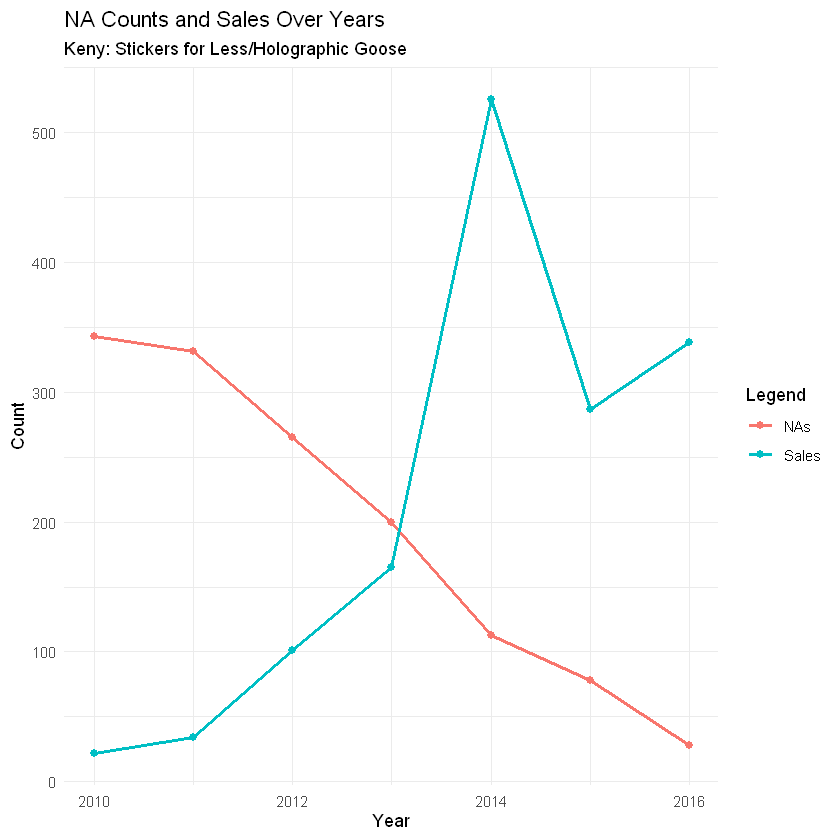

In [34]:
kenya_StickerforLess 

library(tidyr)

# Reshape data to long format
data_long <- kenya_StickerforLess  %>%
  pivot_longer(cols = c(NAs, Sales), names_to = "Type", values_to = "Count")

# Display the reshaped data (optional)
print(data_long)

# Create the plot
ggplot(data_long, aes(x = Yrs, y = Count, color = Type, group = Type)) +
  geom_line(size = 1) +
  geom_point(size = 2) +
  labs(title = "NA Counts and Sales Over Years",
       subtitle = "Keny: Stickers for Less/Holographic Goose",
       x = "Year",
       y = "Count",
       color = "Legend") +
  theme_minimal()


### <font color = lime> group-by / date example:

In [35]:
test_sales <- kenya %>% filter( !is.na(num_sold) & product == "Holographic Goose" & store == "Stickers for Less" & year == "2010")
test_sales %>% filter(mo == "Jan") %>% summarize(sales = sum(num_sold))
head(test_sales,3)

sales
<dbl>
30


id,date,country,store,product,num_sold,year,mo,day,wkday
<dbl>,<date>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<ord>,<int>,<ord>
50,2010-01-01,Kenya,Stickers for Less,Holographic Goose,5,2010,Jan,1,Fri
140,2010-01-02,Kenya,Stickers for Less,Holographic Goose,5,2010,Jan,2,Sat
230,2010-01-03,Kenya,Stickers for Less,Holographic Goose,5,2010,Jan,3,Sun


In [36]:
# Assuming your dataframe is named 'df'
# Group by month and summarize total sales for each month
monthly_data <- test_sales %>%
  mutate(month = floor_date(date, "month")) %>%
  group_by(month) %>%
  summarise(total_sales = sum(num_sold, na.rm = TRUE)) 

# Display the monthly data
print(monthly_data)
sum(monthly_data$total_sales)

# A tibble: 5 × 2
  month      total_sales
  <date>           <dbl>
1 2010-01-01          30
2 2010-02-01           5
3 2010-10-01           5
4 2010-11-01          20
5 2010-12-01          51


[1] 111

In [37]:
# Holographic Goose at the Stickers for Less stores
kenya_StickerforLess 

NAs,Sales,Yrs
<dbl>,<dbl>,<dbl>
343,22,2010
331,34,2011
265,101,2012
200,165,2013
113,525,2014
78,287,2015
28,338,2016


# <font color = lime> Kenya...||... (3) stores... || ... Holographic Goose (1) product

## <font color = lime> Sticker for Less: 1358 NA  ( ????????
## <font color = lime> Premium Sticker Mart: 646 NA (remove 290 / replace 356 )
## <font color = lime> Discount Stickers: 64 NA   ( Remove 1 / replace 63 )

In [38]:
# sum(is.na(kenya))
cat("\n Sum of Kenya, all NA, current tally is : ", sum(is.na(kenya)), "\n\n")

dim(kenya %>% filter( is.na(num_sold) & product == "Holographic Goose" & store == "Stickers for Less"))   # 1358 x 10
dim(kenya %>% filter(!is.na(num_sold) & product == "Holographic Goose" & store == "Discount Stickers"))       # 0 x 10
dim(kenya %>% filter(is.na(num_sold) & product == "Holographic Goose" & store == "Premium Sticker Mart"))      # 646 x 10

# That elusive 64 is: 
dim(kenya %>% filter(store == "Discount Stickers" & is.na(num_sold)))    # Rather insignificant NA sales / tf full sales , T/F impute
target_ken_discount_stickers_kerneler <- kenya %>% filter(store == "Discount Stickers" & is.na(num_sold) & product =="Kerneler")    # 
("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
dim(target_ken_discount_stickers_kerneler)
("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
# 1358+646+64
cat("\n Sum of Kenya, all stores, all years NA are reconcilled, 1358+646+64 =  ", 1358+646+64, "\n\n")
sum(is.na(kenya))


 Sum of Kenya, all NA, current tally is :  2068 



[1] 1358   10

[1]  0 10

[1] 646  10

[1] 64 10

[1] "xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx"

[1] 63 10

[1] "xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx"


 Sum of Kenya, all stores, all years NA are reconcilled, 1358+646+64 =   2068 



[1] 2068

### <font color = lime> Kenya: Premium Sticker Mart: NA = 646 

In [39]:
dim(kenya %>% filter( is.na(num_sold) & product == "Holographic Goose" & store == "Premium Sticker Mart"))        # 646 NA / 1911 sold
dim(kenya %>% filter( !is.na(num_sold) & product == "Holographic Goose" & store == "Premium Sticker Mart" & year == "2010"))   # 277 NA / 88
dim(kenya %>% filter( !is.na(num_sold) & product == "Holographic Goose" & store == "Premium Sticker Mart" & year == "2011"))   # 217  NA / 148
dim(kenya %>% filter( !is.na(num_sold) & product == "Holographic Goose" & store == "Premium Sticker Mart" & year == "2012"))   #  92 NA / 274 
dim(kenya %>% filter( !is.na(num_sold) & product == "Holographic Goose" & store == "Premium Sticker Mart" & year == "2013"))   #  48 NA / 317
dim(kenya %>% filter( !is.na(num_sold) & product == "Holographic Goose" & store == "Premium Sticker Mart" & year == "2014"))   #  10 NA/ 355
dim(kenya %>% filter( !is.na(num_sold) & product == "Holographic Goose" & store == "Premium Sticker Mart" & year == "2015"))   #  2  NA/ 363
dim(kenya %>% filter( !is.na(num_sold) & product == "Holographic Goose" & store == "Premium Sticker Mart" & year == "2016"))   #  0  NA/ 646  ???
277+217+92+48+10+2
88+148+274+317+355+363+646


[1] 646  10

[1] 88 10

[1] 148  10

[1] 274  10

[1] 317  10

[1] 355  10

[1] 363  10

[1] 366  10

[1] 646

[1] 2191

[1] 646

NAs,Sales,Yrs
<dbl>,<dbl>,<dbl>
277,88,2010
217,148,2011
92,274,2012
48,317,2013
10,355,2014
2,363,2015
0,1012,2016


# A tibble: 14 × 3
     Yrs Type  Count
   <dbl> <chr> <dbl>
 1  2010 NAs     277
 2  2010 Sales    88
 3  2011 NAs     217
 4  2011 Sales   148
 5  2012 NAs      92
 6  2012 Sales   274
 7  2013 NAs      48
 8  2013 Sales   317
 9  2014 NAs      10
10  2014 Sales   355
11  2015 NAs       2
12  2015 Sales   363
13  2016 NAs       0
14  2016 Sales  1012


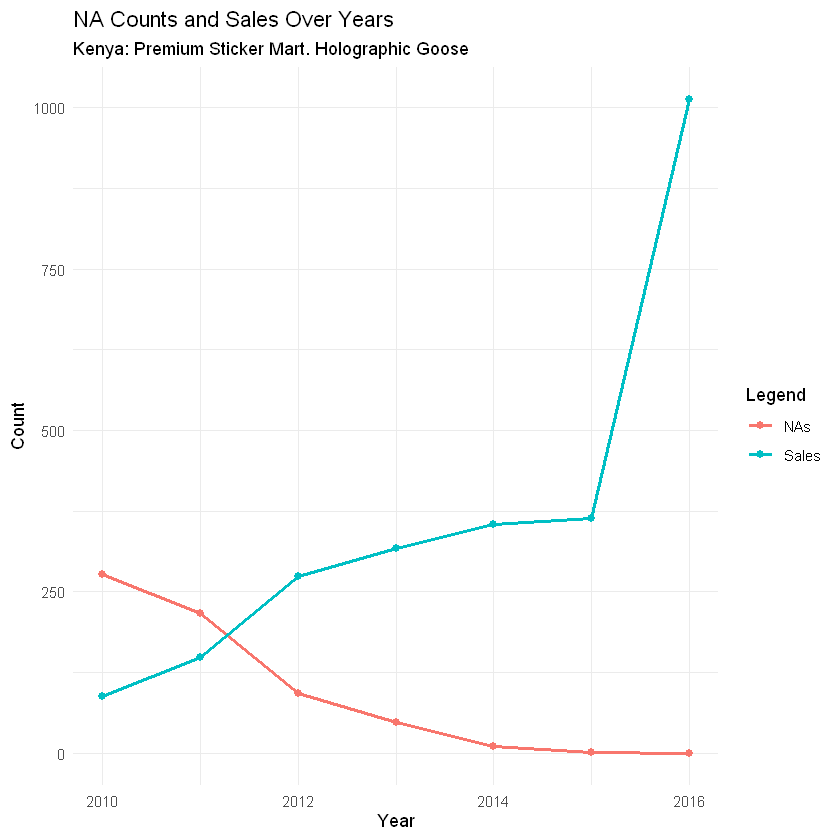

In [40]:
premium_sticker_mart <- data.frame(NAs = c(277,217,92,48,10,2,0), Sales = c(88,148,274,317,355,363,366+646), Yrs = c(2010,2011,2012,2013,2014,2015,2016) )
sum(premium_sticker_mart$NAs)
premium_sticker_mart

# Reshape data to long format
data_long <- premium_sticker_mart %>%
  pivot_longer(cols = c(NAs, Sales), names_to = "Type", values_to = "Count")

# Display the reshaped data (optional)
print(data_long)

# Create the plot
psm <- ggplot(data_long, 
              aes(x = Yrs, y = Count, color = Type, group = Type)) +
  geom_line(size = 1) +
  geom_point(size = 2) +
  labs(title = "NA Counts and Sales Over Years",
       subtitle = "Kenya: Premium Sticker Mart. Holographic Goose",
       x = "Year",
       y = "Count",
       color = "Legend") +
  theme_minimal()
psm

## <font color = lime> Kenya: Discount Stickers: 63 NA (two) years

In [41]:
# cycle through the filtered kenya with years to find the year w/ NA
dim(kenya %>% filter(store == "Discount Stickers" & !is.na(num_sold) & product =="Kerneler" & year == 2011))
# dim(kenya %>% filter(store == "Discount Stickers" & !is.na(num_sold) & product =="Kerneler" & year == 2011) )
discount_stickers <- data.frame(NAs = c(46,17), Sold = c(319,348) , Mean = c(6.063, 6.152), Yr = c(2010,2011) )
discount_stickers
sum(discount_stickers$NAs)

[1] 348  10

NAs,Sold,Mean,Yr
<dbl>,<dbl>,<dbl>,<dbl>
46,319,6.063,2010
17,348,6.152,2011


[1] 63

Mean,Yr,Type,Count
<dbl>,<dbl>,<chr>,<dbl>
6.063,2010,NAs,46
6.063,2010,Sold,319
6.152,2011,NAs,17
6.152,2011,Sold,348


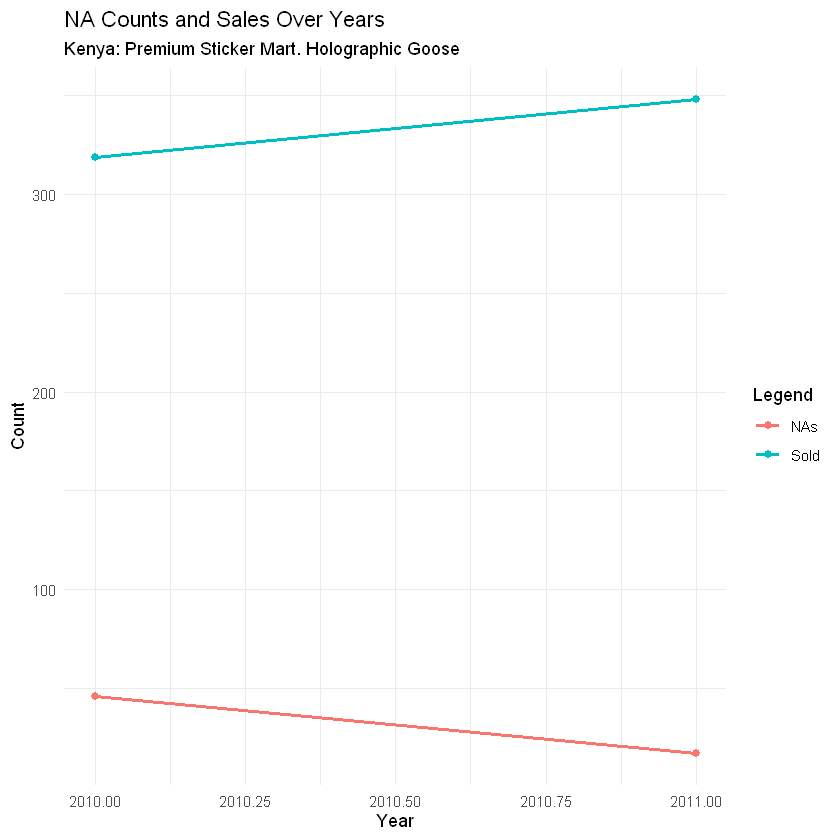

In [42]:
data_long <- discount_stickers %>%
  pivot_longer(cols = c(NAs, Sold), names_to = "Type", values_to = "Count")
data_long

# Create the plot
ggplot(data_long, 
              aes(x = Yr, y = Count, color = Type, group = Type)) +
  geom_line(size = 1) +
  geom_point(size = 2) +
  labs(title = "NA Counts and Sales Over Years",
       subtitle = "Kenya: Premium Sticker Mart. Holographic Goose",
       x = "Year",
       y = "Count",
       color = "Legend") +
  theme_minimal()


In [43]:
dim(kenya %>% filter(store == "Discount Stickers" & is.na(num_sold) & product !="Kerneler")) # the odd ball is found
found <- kenya %>% filter(store == "Discount Stickers" & is.na(num_sold) & product !="Kerneler") # the odd ball is found
found
# id that odd ball
# id that odd ball

[1]  1 10

id,date,country,store,product,num_sold,year,mo,day,wkday
<dbl>,<date>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<ord>,<int>,<ord>
23719,2010-09-21,Kenya,Discount Stickers,Kerneler Dark Mode,NA,2010,Sep,21,Tue


In [44]:
# Find replacement value: use the mean for the 1 NA replacment 

dim(kenya %>% filter(store == "Discount Stickers" & year == "2010" & product == "Kerneler Dark Mode" )) #  days 365 / num_sold 2475 / mean 6.782
temp <- kenya %>% filter(store == "Discount Stickers" & year == "2010" & product == "Kerneler Dark Mode" ) 
sum(temp$num_sold)

temp1 <- temp %>% 
  filter(mo == "Sep") %>% 
  summarize(mean_sold = mean(num_sold, na.rm = TRUE))

 # summary(temp %>% filter(mo == "Sep") )   # confirms

# The replacement value for the single NA at Discount Stickers, Kerneler Dark Mode
temp1


[1] 365  10

[1] NA

mean_sold
<dbl>
5.344828


# <font color = lime>Discount Stickers: Replace (1) / Replace (63) 

### <font color = yellow> Remove NA when NA > Sales, Replace NA w/ 0 when Sales > NA


In [45]:
sum(is.na(train))
sum(is.na(kenya))
sum(is.na(canada))
2068+1689

[1] 3757

[1] 2068

[1] 1689

[1] 3757

## <font color = lime> Kenya | train || ...Replace the (1) NA Kerneler w/ imputed mean

In [46]:
temp1
kenya %>% filter(store == "Discount Stickers" & is.na(num_sold) & product !="Kerneler")
train %>% filter( country == "Kenya", store == "Discount Stickers" & is.na(num_sold) & product !="Kerneler")

mean_sold
<dbl>
5.344828


id,date,country,store,product,num_sold,year,mo,day,wkday
<dbl>,<date>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<ord>,<int>,<ord>
23719,2010-09-21,Kenya,Discount Stickers,Kerneler Dark Mode,NA,2010,Sep,21,Tue


id,date,country,store,product,num_sold,year,mo,day,wkday
<dbl>,<date>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<ord>,<int>,<ord>
23719,2010-09-21,Kenya,Discount Stickers,Kerneler Dark Mode,NA,2010,Sep,21,Tue


In [47]:
# Replace the single NA with imputed mean value (both kenya and train )
train <- train %>%
  mutate(num_sold = ifelse(id == 23719 & is.na(num_sold), 5.345, num_sold))

kenya <- kenya %>%
  mutate(num_sold = ifelse(id == 23719 & is.na(num_sold), 5.345, num_sold))

# Display the updated dataframe
train %>% filter(id == "23719")
kenya %>% filter(id == "23719")

sum(is.na(train))     # perfect
sum(is.na(kenya))    #  Right ... reduced by 1
sum(is.na(canada))
2067+1689

id,date,country,store,product,num_sold,year,mo,day,wkday
<dbl>,<date>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<ord>,<int>,<ord>
23719,2010-09-21,Kenya,Discount Stickers,Kerneler Dark Mode,5.345,2010,Sep,21,Tue


id,date,country,store,product,num_sold,year,mo,day,wkday
<dbl>,<date>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<ord>,<int>,<ord>
23719,2010-09-21,Kenya,Discount Stickers,Kerneler Dark Mode,5.345,2010,Sep,21,Tue


[1] 3756

[1] 2067

[1] 1689

[1] 3756

## <font color = lime> Replace the (63) NA Kerneler w/ imputed mean

In [48]:
discount_stickers

NAs,Sold,Mean,Yr
<dbl>,<dbl>,<dbl>,<dbl>
46,319,6.063,2010
17,348,6.152,2011


In [49]:
dim(kenya %>% filter(store == "Discount Stickers" & is.na(num_sold) & product =="Kerneler" & year == 2010))



[1] 46 10

# <font color = lime> Premium Sticker Mart : .. 646 NAs

#### The Question:  Where do the lines cross in 2011 ? 

[1] 646

[1] 646  10

id,date,country,store,product,num_sold,year,mo,day,wkday
<dbl>,<date>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<ord>,<int>,<ord>
505,2010-01-06,Kenya,Premium Sticker Mart,Holographic Goose,NA,2010,Jan,6,Wed
595,2010-01-07,Kenya,Premium Sticker Mart,Holographic Goose,NA,2010,Jan,7,Thu


NAs,Sales,Yrs
<dbl>,<dbl>,<dbl>
277,88,2010
217,148,2011
92,274,2012
48,317,2013
10,355,2014
2,363,2015
0,1012,2016


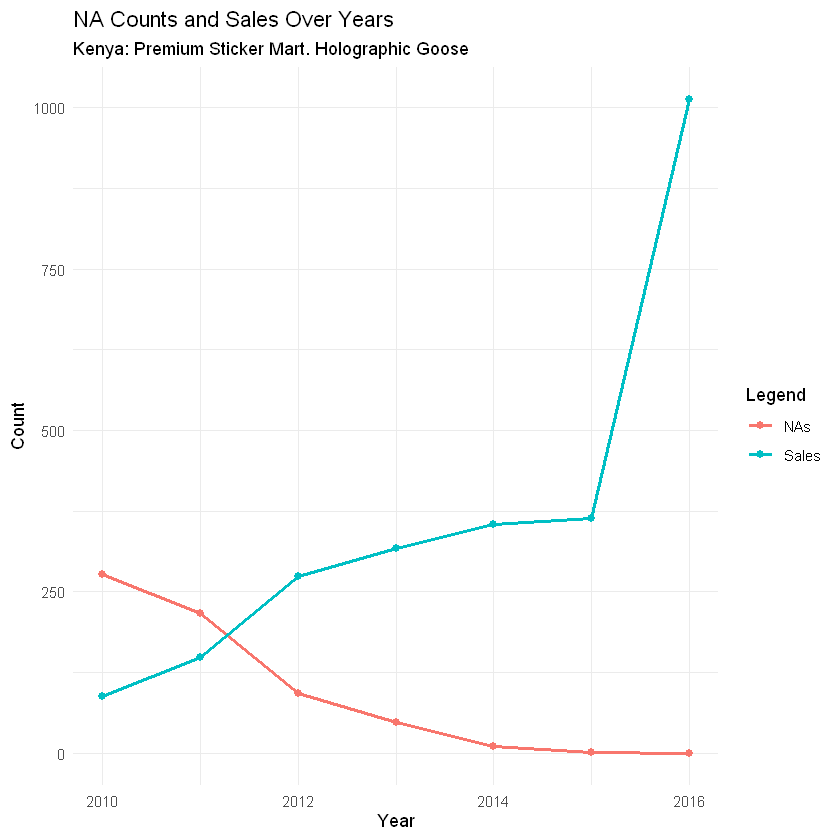

In [50]:
sum(premium_sticker_mart$NAs)
dim(kenya %>% filter( is.na(num_sold) & product == "Holographic Goose" & store == "Premium Sticker Mart"))        # 646 NA / 1911 sold
head(kenya %>% filter( is.na(num_sold) & product == "Holographic Goose" & store == "Premium Sticker Mart"),2)        # 646 NA / 1911 sold
premium_sticker_mart
psm # plot

### <font color = lime> dplyr: return() fct

In [51]:
# Use dplyr's beween fct() 

# Define start and end dates 
start_date <- as.Date("2010-01-01") 
end_date <- as.Date("2011-03-06") 

# Filter data for the product "Holographic Goose", store "Premium Sticker Mart", and date range from Jan 1 to Mar 6 
going_goners <- kenya %>% filter( product == "Holographic Goose" & 
                    store == "Premium Sticker Mart" & 
                    between(date, start_date, end_date) )

("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
dim(going_goners)  # all rows
sum(is.na(going_goners))  # only NA rows
("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")

going_goner_nas <- going_goners %>% filter(is.na(num_sold) )
dim(going_goner_nas)

head(going_goner_nas,3)

("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
going_goner_indices <- going_goner_nas$id
length(going_goner_indices)
head(going_goner_indices, 4)
("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
 
kenya %>% filter(id == 505) 
train %>% filter(id == 505)

[1] "xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx"

[1] 430  10

[1] 290

[1] "xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx"

[1] 290  10

id,date,country,store,product,num_sold,year,mo,day,wkday
<dbl>,<date>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<ord>,<int>,<ord>
505,2010-01-06,Kenya,Premium Sticker Mart,Holographic Goose,NA,2010,Jan,6,Wed
595,2010-01-07,Kenya,Premium Sticker Mart,Holographic Goose,NA,2010,Jan,7,Thu
955,2010-01-11,Kenya,Premium Sticker Mart,Holographic Goose,NA,2010,Jan,11,Mon


[1] "xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx"

[1] 290

[1]  505  595  955 1045

[1] "xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx"

id,date,country,store,product,num_sold,year,mo,day,wkday
<dbl>,<date>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<ord>,<int>,<ord>
505,2010-01-06,Kenya,Premium Sticker Mart,Holographic Goose,NA,2010,Jan,6,Wed


id,date,country,store,product,num_sold,year,mo,day,wkday
<dbl>,<date>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<ord>,<int>,<ord>
505,2010-01-06,Kenya,Premium Sticker Mart,Holographic Goose,NA,2010,Jan,6,Wed


In [52]:
psm_mean_yr <- data.frame(year = c(2010,2011,2012,2013,2014,2015,2016), means = c(0, 5.216, 5.42, 5.587, 6.028, 6.229, 6.73) )
psm_mean_yr

year,means
<dbl>,<dbl>
2010,0.000
2011,5.216
2012,5.420
2013,5.587
2014,6.028
2015,6.229
2016,6.730


# <font color = lime> Premium Sticker Mart < 03/06/2012

#### Remove the rows (290)  & Replace 356 NA w/ means? 

In [53]:
sum(is.na(train)) # one NA replaced earlier 
sum(is.na(kenya))
3756-2067

[1] 3756

[1] 2067

[1] 1689

In [54]:
head(going_goner_indices, 4)
tail(going_goner_indices, 2)

kenya %>% filter(id == 505)
# train %>% filter(id == 1855)
train %>% filter(id == 38395)   # last day in range before 3/06/2012
length(going_goner_indices)

nrow(kenya)
nrow(train)

[1]  505  595  955 1045

[1] 38215 38395

id,date,country,store,product,num_sold,year,mo,day,wkday
<dbl>,<date>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<ord>,<int>,<ord>
505,2010-01-06,Kenya,Premium Sticker Mart,Holographic Goose,NA,2010,Jan,6,Wed


id,date,country,store,product,num_sold,year,mo,day,wkday
<dbl>,<date>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<ord>,<int>,<ord>
38395,2011-03-03,Kenya,Premium Sticker Mart,Holographic Goose,NA,2011,Mar,3,Thu


[1] 290

[1] 35798

[1] 225016

# <font color = lime> Remove range:

In [55]:
# Remove rows from kenya and train using the vector of row ids 
kenya <- kenya %>% filter(!(id %in% going_goner_indices))
train <- train %>% filter(!(id %in% going_goner_indices))
nrow(kenya)
nrow(train)

cat("\n The nrow of kenya after removal of rows: 35798-290 = 35508. ", nrow(kenya), "\n\n")
train %>% filter(id == 38395)   # indices have been removed

[1] 35508

[1] 224726


 The nrow of kenya after removal of rows: 35798-290 = 35508.  35508 



id,date,country,store,product,num_sold,year,mo,day,wkday
<dbl>,<date>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<ord>,<int>,<ord>


In [56]:
sum(is.na(train))   # 3757 - 1 - 290 = 3466.  Agrees / Reconciles
sum(is.na(kenya))

[1] 3466

[1] 1777

In [57]:
dim(kenya %>% filter( is.na(num_sold) & product == "Holographic Goose" & store == "Premium Sticker Mart"))
646 -290  # proofs
head(kenya %>% filter( is.na(num_sold) & product == "Holographic Goose" & store == "Premium Sticker Mart"),2)

[1] 356  10

[1] 356

id,date,country,store,product,num_sold,year,mo,day,wkday
<dbl>,<date>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<ord>,<int>,<ord>
38755,2011-03-07,Kenya,Premium Sticker Mart,Holographic Goose,NA,2011,Mar,7,Mon
38845,2011-03-08,Kenya,Premium Sticker Mart,Holographic Goose,NA,2011,Mar,8,Tue


# <font color = lime> Remove range: again ?

In [58]:
# nrow(train)
# # Remove rows from kenya and train using the vector of row ids 
# train <- train %>% filter(!(id %in% going_goner_indices))
# nrow(train)
# 225016 -290 # proofs

In [59]:
sum(is.na(train))
sum(is.na(kenya))

[1] 3466

[1] 1777

## <font color = yellow> train / kenya: all NA rows < 03/06/2012 are gone. 

#### <font color = lime> Next ... Replace remaining (356) NA w/ ? || Kenya || Premium Sticker Mart || Holographic Goose || > 03/06/12

In [60]:
temp <- kenya %>% filter(store == "Premium Sticker Mart" & product == "Holographic Goose" & is.na(num_sold) )
psm_indices <- temp$id
length(psm_indices)
head(psm_indices)
kenya %>% filter(id == 38755)

[1] 356

[1] 38755 38845 38935 39025 39115 39385

id,date,country,store,product,num_sold,year,mo,day,wkday
<dbl>,<date>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<ord>,<int>,<ord>
38755,2011-03-07,Kenya,Premium Sticker Mart,Holographic Goose,NA,2011,Mar,7,Mon


### <font color = lime> Group_by years and find the mean values

In [61]:
dim(kenya %>% filter(store == "Premium Sticker Mart" & product == "Holographic Goose" & !is.na(num_sold) ))
premium_sticker_mart_yr_nas <- data.frame(NAs = c(NA,204 ,92,48,10,2,0 ),   # zero replaced with NA to remove first segment in plot
                         Sold = c(88,148,274,317,355,363,366),
                        Mean = c(0, 5.216, 5.42, 5.587,6.028, 6.229, 6.73),  
                        Yrs = c(2010, 2011,2012,2013,2014,2015, 2016)  )
premium_sticker_mart_yr_nas
sum(premium_sticker_mart_yr_nas$Sold)
204+92+48+10+2   # sum of NAs

[1] 1911   10

NAs,Sold,Mean,Yrs
<dbl>,<dbl>,<dbl>,<dbl>
NA,88,0.000,2010
204,148,5.216,2011
92,274,5.420,2012
48,317,5.587,2013
10,355,6.028,2014
2,363,6.229,2015
0,366,6.730,2016


[1] 1911

[1] 356

Warning message:
"Removed 1 row containing missing values or values
outside the scale range (`geom_line()`)."
Warning message:
"Removed 1 row containing missing values or values
outside the scale range (`geom_point()`)."


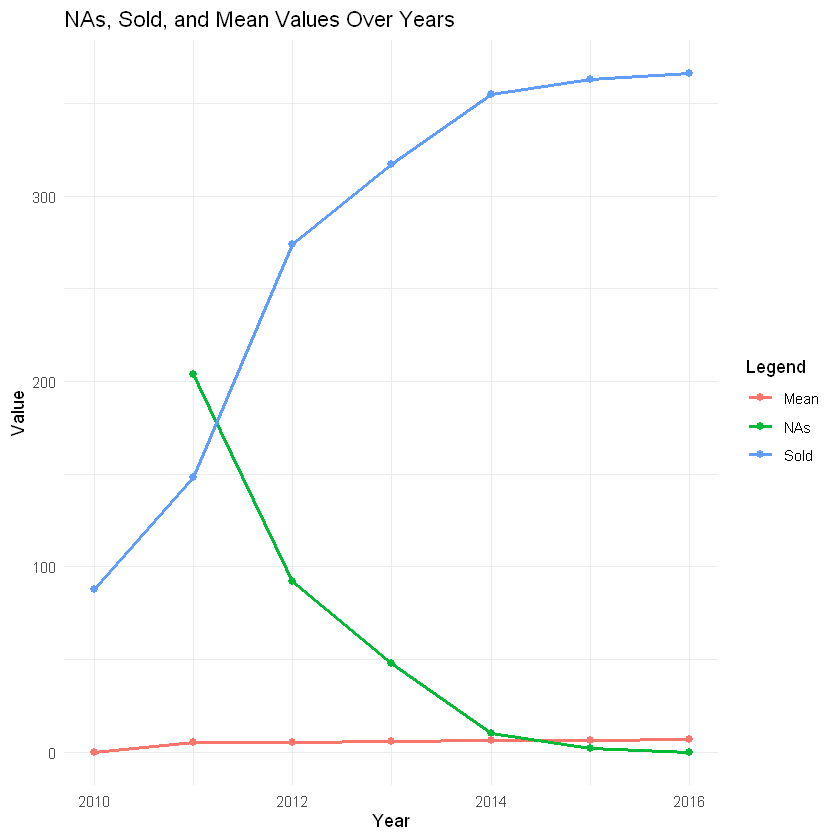

In [62]:
# Reshape data to long format
data_long <- premium_sticker_mart_yr_nas %>%
  pivot_longer(cols = c(NAs, Sold, Mean), names_to = "Type", values_to = "Value")

# Display the reshaped data (optional)
# print(data_long)

# Create the plot
ggplot(data_long, aes(x = Yrs, y = Value, color = Type, group = Type)) +
  geom_line(size = 1) +
  geom_point(size = 2) +
  labs(
    title = "NAs, Sold, and Mean Values Over Years",
    x = "Year",
    y = "Value",
    color = "Legend"
  ) +
  theme_minimal()



In [63]:
temp <- kenya %>% filter(store == "Premium Sticker Mart" & product == "Holographic Goose" & is.na(num_sold) & year == 2011)
indice2011 <- temp$id 
length(indice2011)
temp <- kenya %>% filter(store == "Premium Sticker Mart" & product == "Holographic Goose" & is.na(num_sold) & year == 2012)
indice2012 <- temp$id
length(indice2012)
temp <- kenya %>% filter(store == "Premium Sticker Mart" & product == "Holographic Goose" & is.na(num_sold) & year == 2013)
indice2013 <- temp$id
length(indice2013)
temp <- kenya %>% filter(store == "Premium Sticker Mart" & product == "Holographic Goose" & is.na(num_sold) & year == 2014)
indice2014 <- temp$id 
length(indice2014)
temp <- kenya %>% filter(store == "Premium Sticker Mart" & product == "Holographic Goose" & is.na(num_sold) & year == 2015)
indice2015 <- temp$id 
length(indice2015)
temp <- kenya %>% filter(store == "Premium Sticker Mart" & product == "Holographic Goose" & is.na(num_sold) & year == 2016)
indice2016 <- temp$id 
length(indice2016)

premium_sticker_mart_yr_nas       
204+92+48+10+2
88+148+274+317+355+363+366

[1] 204

[1] 92

[1] 48

[1] 10

[1] 2

[1] 0

NAs,Sold,Mean,Yrs
<dbl>,<dbl>,<dbl>,<dbl>
NA,88,0.000,2010
204,148,5.216,2011
92,274,5.420,2012
48,317,5.587,2013
10,355,6.028,2014
2,363,6.229,2015
0,366,6.730,2016


[1] 356

[1] 1911

In [64]:
sum(is.na(train))
sum(is.na(kenya))

[1] 3466

[1] 1777

In [65]:
head(indice2011)
tail(indice2011)
kenya %>% filter(id == 38755)

head(kenya %>% filter(store == "Premium Sticker Mart" & product == "Holographic Goose" & is.na(num_sold) & year == 2011),3)

[1] 38755 38845 38935 39025 39115 39385

[1] 62785 63415 63955 64585 64675 64855

id,date,country,store,product,num_sold,year,mo,day,wkday
<dbl>,<date>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<ord>,<int>,<ord>
38755,2011-03-07,Kenya,Premium Sticker Mart,Holographic Goose,NA,2011,Mar,7,Mon


id,date,country,store,product,num_sold,year,mo,day,wkday
<dbl>,<date>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<ord>,<int>,<ord>
38755,2011-03-07,Kenya,Premium Sticker Mart,Holographic Goose,NA,2011,Mar,7,Mon
38845,2011-03-08,Kenya,Premium Sticker Mart,Holographic Goose,NA,2011,Mar,8,Tue
38935,2011-03-09,Kenya,Premium Sticker Mart,Holographic Goose,NA,2011,Mar,9,Wed


# <font color = lime> Replace test

In [66]:
# Replace NAs with 5 based on id values
test <- kenya %>% filter(year == 2011) %>%
          mutate(num_sold = ifelse(id %in% indice2011 & is.na(num_sold), 5.216, num_sold))

test %>% filter(id == 38755)  # first indice 2011
test %>% filter(id == 64855)  # last indice 2011

id,date,country,store,product,num_sold,year,mo,day,wkday
<dbl>,<date>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<ord>,<int>,<ord>
38755,2011-03-07,Kenya,Premium Sticker Mart,Holographic Goose,5.216,2011,Mar,7,Mon


id,date,country,store,product,num_sold,year,mo,day,wkday
<dbl>,<date>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<ord>,<int>,<ord>
64855,2011-12-22,Kenya,Premium Sticker Mart,Holographic Goose,5.216,2011,Dec,22,Thu


In [67]:
sum(is.na(train))  # Agrees
sum(is.na(kenya))
sum(is.na(canada))

[1] 3466

[1] 1777

[1] 1689

In [68]:
cat("\n Updated Kenya NAs, 2011 NA = 204, prior sum(is.na(kenya)) = 1911. T/F: 1911-204 = 1707 \n\n")

# sum(is.na(kenya))
# sum(is.na(train))


 Updated Kenya NAs, 2011 NA = 204, prior sum(is.na(kenya)) = 1911. T/F: 1911-204 = 1707 



## <font color = yellow> Create indices for each year (for replacements)

In [69]:
# length(indice2010)
length(indice2011)
length(indice2012)
length(indice2013)
length(indice2014)
length(indice2015)
length(indice2016)
204+92+48+10+2
head(indice2011,3 )
kenya %>% filter(id==38755)

[1] 204

[1] 92

[1] 48

[1] 10

[1] 2

[1] 0

[1] 356

[1] 38755 38845 38935

id,date,country,store,product,num_sold,year,mo,day,wkday
<dbl>,<date>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<ord>,<int>,<ord>
38755,2011-03-07,Kenya,Premium Sticker Mart,Holographic Goose,NA,2011,Mar,7,Mon


## <font color = lime> Kenya: replace (356) NAs w/ imputed mean values (5) Yrs

In [70]:
sum(is.na(kenya))
dim(kenya)
kenya %>% filter(id==38755)
# Update the dataframe in one step
kenya <- kenya %>%
  mutate(
    num_sold = case_when(
      year == 2011 & id %in% indice2011 & is.na(num_sold) ~ 5.216,
      year == 2012 & id %in% indice2012 & is.na(num_sold) ~ 5.42,
      year == 2013 & id %in% indice2013 & is.na(num_sold) ~ 5.587,
      year == 2014 & id %in% indice2014 & is.na(num_sold) ~ 6.028,
      year == 2015 & id %in% indice2015 & is.na(num_sold) ~ 6.229,
      year == 2016 & id %in% indice2016 & is.na(num_sold) ~ 6.73,       
      TRUE ~ num_sold
    )
  )

# Display the updated dataframe

kenya %>% filter(id==38755)
1777- 356

[1] 1777

[1] 35508    10

id,date,country,store,product,num_sold,year,mo,day,wkday
<dbl>,<date>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<ord>,<int>,<ord>
38755,2011-03-07,Kenya,Premium Sticker Mart,Holographic Goose,NA,2011,Mar,7,Mon


id,date,country,store,product,num_sold,year,mo,day,wkday
<dbl>,<date>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<ord>,<int>,<ord>
38755,2011-03-07,Kenya,Premium Sticker Mart,Holographic Goose,5.216,2011,Mar,7,Mon


[1] 1421

In [71]:
sum(is.na(train))
sum(is.na(kenya))
sum(is.na(canada))
1421+1689

[1] 3466

[1] 1421

[1] 1689

[1] 3110

In [72]:
premium_sticker_mart_yr_nas
204+92+48+10+2
sum(premium_sticker_mart_yr_nas$Sold)

NAs,Sold,Mean,Yrs
<dbl>,<dbl>,<dbl>,<dbl>
NA,88,0.000,2010
204,148,5.216,2011
92,274,5.420,2012
48,317,5.587,2013
10,355,6.028,2014
2,363,6.229,2015
0,366,6.730,2016


[1] 356

[1] 1911

# <font color = lime> train: replace (356) NAs

In [73]:
sum(is.na(train))

[1] 3466

In [74]:
# replace the NAs with the indices of the store / each year
train %>% filter(id==38755)
# Update the dataframe in one step
train <- train %>%
  mutate(
    num_sold = case_when(
      year == 2011 & id %in% indice2011 & is.na(num_sold) ~ 5.216,
      year == 2012 & id %in% indice2012 & is.na(num_sold) ~ 5.42,
      year == 2013 & id %in% indice2013 & is.na(num_sold) ~ 5.587,
      year == 2014 & id %in% indice2014 & is.na(num_sold) ~ 6.028,
      year == 2015 & id %in% indice2015 & is.na(num_sold) ~ 6.229,
      year == 2016 & id %in% indice2016 & is.na(num_sold) ~ 6.73,       
      TRUE ~ num_sold
    )
  )

# Display the updated dataframe

train %>% filter(id==38755)
1777- 356

id,date,country,store,product,num_sold,year,mo,day,wkday
<dbl>,<date>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<ord>,<int>,<ord>
38755,2011-03-07,Kenya,Premium Sticker Mart,Holographic Goose,NA,2011,Mar,7,Mon


id,date,country,store,product,num_sold,year,mo,day,wkday
<dbl>,<date>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<ord>,<int>,<ord>
38755,2011-03-07,Kenya,Premium Sticker Mart,Holographic Goose,5.216,2011,Mar,7,Mon


[1] 1421

In [75]:
sum(is.na(train))
sum(is.na(kenya))
sum(is.na(canada))
1421+1689           # agrees

[1] 3110

[1] 1421

[1] 1689

[1] 3110

In [76]:
1421-1358


[1] 63

# <font color = lime> Stickers for Less: 1358 NAs

In [77]:
dim(kenya %>% filter(is.na(num_sold) & store == "Stickers for Less" & product == "Holographic Goose"))
head(kenya %>% filter(is.na(num_sold) & store == "Stickers for Less" & product == "Holographic Goose"), 3)
tail(kenya %>% filter(is.na(num_sold) & store == "Stickers for Less" & product == "Holographic Goose"), 3)

# summary(kenya %>% filter(!is.na(num_sold) & store == "Stickers for Less" & product == "Holographic Goose" & year == 2016))
sticker_for_less <- data.frame(NAs = c(343,331,265,200,113,78,28), 
                               Sold = c(22,34,101,165,252,287,338), 
                               Mean = c(5.045,5.088,5.257,5.261,5.365,5.488,5.766), 
                               Yr = c(2010, 2011,2012,2013,2014,2015,2016)
                              )

sticker_for_less
sum(sticker_for_less$NAs)


[1] 1358   10

id,date,country,store,product,num_sold,year,mo,day,wkday
<dbl>,<date>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<ord>,<int>,<ord>
320,2010-01-04,Kenya,Stickers for Less,Holographic Goose,NA,2010,Jan,4,Mon
410,2010-01-05,Kenya,Stickers for Less,Holographic Goose,NA,2010,Jan,5,Tue
500,2010-01-06,Kenya,Stickers for Less,Holographic Goose,NA,2010,Jan,6,Wed


id,date,country,store,product,num_sold,year,mo,day,wkday
<dbl>,<date>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<ord>,<int>,<ord>
217670,2016-08-15,Kenya,Stickers for Less,Holographic Goose,NA,2016,Aug,15,Mon
219110,2016-08-31,Kenya,Stickers for Less,Holographic Goose,NA,2016,Aug,31,Wed
220280,2016-09-13,Kenya,Stickers for Less,Holographic Goose,NA,2016,Sep,13,Tue


NAs,Sold,Mean,Yr
<dbl>,<dbl>,<dbl>,<dbl>
343,22,5.045,2010
331,34,5.088,2011
265,101,5.257,2012
200,165,5.261,2013
113,252,5.365,2014
78,287,5.488,2015
28,338,5.766,2016


[1] 1358

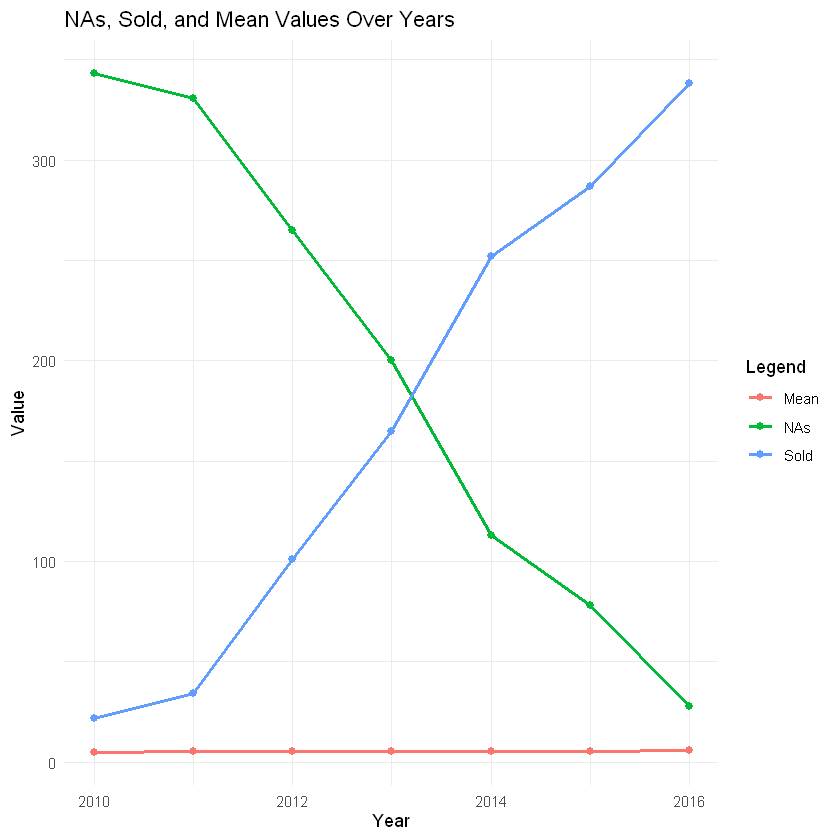

In [78]:
# Reshape data to long format
data_long <- sticker_for_less %>%
  pivot_longer(cols = c(NAs, Sold, Mean), names_to = "Type", values_to = "Value")

# Display the reshaped data (optional)
# print(data_long)

# Create the plot
ggplot(data_long, aes(x = Yr, y = Value, color = Type, group = Type)) +
  geom_line(size = 1) +
  geom_point(size = 2) +
  labs(
    title = "NAs, Sold, and Mean Values Over Years",
    x = "Year",
    y = "Value",
    color = "Legend"
  ) +
  theme_minimal()


ERROR: Error: object 'stopper' not found


### <font color = lime> Reconcile NAs 

In [80]:
sum(is.na(kenya))
sum(is.na(canada))

sum(is.na(train))
1421+1689

cat("\n Check: total NA Canada are: ", (1308+380+1), "\n")
cat("\n Sum of kenya and Canada NA agree w/ train: ",  (1358+63) + 1689, "\n\n")

[1] 1421

[1] 1689

[1] 3110

[1] 3110


 Check: total NA Canada are:  1689 

 Sum of kenya and Canada NA agree w/ train:  3110 



In [81]:
store1 <- kenya %>% filter(store == "Stickers for Less")
sum(is.na(store1))
store1_indices <- store1$id
store2 <- kenya %>% filter(store == "Premium Sticker Mart")
sum(is.na(store2))
store2_indices <- store2$id
store3 <- kenya %>% filter(store == "Discount Stickers" ) 
sum(is.na(store3))
store3_indices <- store3$id
ken <- 1358+63
cat("\n The total remaining NAs from the 3 store types in Kenya are: ", ken ,"\n\n")

[1] 1358

[1] 0

[1] 63


 The total remaining NAs from the 3 store types in Kenya are:  1421 



## <font color = lime> Drill Down Canada NA:

In [82]:
sum(is.na(canada))
head(canada)

[1] 1689

id,date,country,store,product,num_sold,year,mo,day,wkday
<dbl>,<date>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<ord>,<int>,<ord>
1,2010-01-01,Canada,Discount Stickers,Kaggle,973,2010,Jan,1,Fri
2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906,2010,Jan,1,Fri
3,2010-01-01,Canada,Discount Stickers,Kerneler,423,2010,Jan,1,Fri
4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491,2010,Jan,1,Fri
5,2010-01-01,Canada,Stickers for Less,Holographic Goose,300,2010,Jan,1,Fri
6,2010-01-01,Canada,Stickers for Less,Kaggle,1837,2010,Jan,1,Fri


In [83]:
store1 <- canada %>% filter(store == "Stickers for Less")
sum(is.na(store1))
indices_store1 <- store1$id
store2 <- canada %>% filter(store == "Premium Sticker Mart")
sum(is.na(store2))
indices_store2 <- store2$id
store3 <- canada %>% filter(store == "Discount Stickers" ) 
sum(is.na(store3))
indices_store3 <- store3$id
1308+380+1
can <- 1308 + 380+ 1

cat("\n The total NAs from the 3 store types in Canada are: ", can ,"\n\n")

[1] 1308

[1] 380

[1] 1

[1] 1689


 The total NAs from the 3 store types in Canada are:  1689 



# <font color = lime> STOP:

#### Seasonal Decomposition (for Time Series Data)

In [ ]:
# library(forecast)
# library(lubridate)
# # Assuming `training` has a time series column
# ts_data <- ts(training$variable, frequency = 12) # Monthly data
# decomposed <- decompose(ts_data)

# # Plot the decomposed components
# plot(decomposed)


# Modelish

### <font color = lime> Manual Encoding

In [122]:
country = data.frame(id = c(1,2,3,4,5,6), country = c("Canada", "Finland", "Italy", "Kenya", "Norway", "Singapore") )
dim(country)

product = data.frame(id = c(1,2,3,4,5), product = c("Holographic Goose", "Kaggle", "Kaggle Tiers", "Kerneler", "Kerneler Dark Mode") )
dim(product)

store = data.frame(id = c(1,2,3) , store = c("Discount Stickers", "Stickers for Less", "Premium Sticker Mart") )
dim(store)


[1] 6 2

[1] 5 2

[1] 3 2

In [96]:
test_train <- train
head(test_train %>% filter(country == "1" ),3)


id,date,country,store,product,num_sold,year,mo,day,wkday
<dbl>,<date>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,2010-01-01,1,1,2,973,2010,1,1,6
2,2010-01-01,1,1,3,906,2010,1,1,6
3,2010-01-01,1,1,4,423,2010,1,1,6


### <font color = lime> Encode the classification vars

In [116]:
test_train$country[test_train$country == "Canada"] <- 1
test_train$country[test_train$country == "Finland"] <- 2
test_train$country[test_train$country == "Italy"] <- 3
test_train$country[test_train$country == "Kenya"] <- 4
test_train$country[test_train$country == "Norway"] <- 5
test_train$country[test_train$country == "Singapore"] <- 6
test <- test_train
test_train <- test %>% mutate(country = as.integer(country) )

test_train$product[test_train$product == "Holographic Goose"] <- 1
test_train$product[test_train$product == "Kaggle"] <- 2
test_train$product[test_train$product == "Kaggle Tiers"] <- 3
test_train$product[test_train$product == "Kerneler"] <- 4
test_train$product[test_train$product == "Kerneler Dark Mode"] <- 5
test <- test_train
test_train <- test %>% mutate(product = as.integer(product) )

test_train$store[test_train$store == "Discount Stickers"] <- 1
test_train$store[test_train$store == "Stickers for Less"] <- 2                   
test_train$store[test_train$store == "Premium Sticker Mart"] <- 3
test2 <- test_train
test_train <- test2 %>% mutate(store = as.integer(store) )
head(test_train,2)

# Convert month and weekday to numeric using lubridate functions 
date_train <- test_train %>% mutate(mo = month(date), wkday = wday(date, label = FALSE)) 
head(date_train,3)

# Conver doubles to integer data types

date_train1 <- date_train %>% mutate(num_sold = as.integer(num_sold)) 
date_train2 <- date_train1 %>% mutate(year = as.integer(year) )
date_train3 <- date_train2 %>% mutate(mo = as.integer(mo)) 
date_train4 <- date_train3 %>%  mutate(wkday = as.integer(wkday))

# revert to train 
train <- date_train4
head(train,2)



id,date,country,store,product,num_sold,year,mo,day,wkday
<dbl>,<date>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>
1,2010-01-01,1,1,2,973,2010,1,1,6
2,2010-01-01,1,1,3,906,2010,1,1,6


id,date,country,store,product,num_sold,year,mo,day,wkday
<dbl>,<date>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>
1,2010-01-01,1,1,2,973,2010,1,1,6
2,2010-01-01,1,1,3,906,2010,1,1,6
3,2010-01-01,1,1,4,423,2010,1,1,6


id,date,country,store,product,num_sold,year,mo,day,wkday
<dbl>,<date>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2010-01-01,1,1,2,973,2010,1,1,6
2,2010-01-01,1,1,3,906,2010,1,1,6


## <font color = yellow> train : rough-prep ( 75% NAs removed / encoded vars) 

In [125]:
t(country)
names(train)

id,1,2,3,4,5,6
country,Canada,Finland,Italy,Kenya,Norway,Singapore


[1] "id"       "date"     "country"  "store"    "product"  "num_sold"
 [7] "year"     "mo"       "day"      "wkday"

In [138]:
train %>% filter(country == "4" & id == 320)

id,date,country,store,product,num_sold,year,mo,day,wkday
<dbl>,<date>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
320,2010-01-04,4,2,1,NA,2010,1,4,2


In [141]:
sum(is.na(train))

dim(train %>% filter(country == "4" & is.na(num_sold)  ))
ken_mean_sale <- 20.27   # 34,087 sold / 1421 NA

kenya_train <- train %>% mutate(num_sold = ifelse(is.na(num_sold), 20.27, num_sold) )
kenya_train %>% filter(id == 320)

[1] 3110

[1] 1421   10

id,date,country,store,product,num_sold,year,mo,day,wkday
<dbl>,<date>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
320,2010-01-04,4,2,1,20.27,2010,1,4,2


In [ ]:
stopper 

In [142]:
names(kenya_train)

[1] "id"       "date"     "country"  "store"    "product"  "num_sold"
 [7] "year"     "mo"       "day"      "wkday"

## <font color = lime> Remove id: kenya_train dataset (No NAs = 20.27)

In [148]:
# Use select to remove a column 
kenya_train <- kenya_train %>% select(-id)
names(kenya_train)

[1] "date"     "country"  "store"    "product"  "num_sold" "year"     "mo"      
[8] "day"      "wkday"

## <font color = yellow> Split the data (kenya_train)

In [158]:
# Load necessary packages
library(caret)

# Define x (predictors) and y (target variable)
x <- kenya_train %>%
  select(-num_sold)  # Exclude the target variable
y <- kenya_train$num_sold

# Create an index for splitting the data
train_index <- createDataPartition(y, p = 0.8, list = FALSE)

# Split the data into training and testing sets
train_data_x <- x[train_index, ]
test_data_x <- x[-train_index, ]
train_data_y <- y[train_index]
test_data_y <- y[-train_index]

# Convert to H2O frame for further analysis 
train_data_h2o <- as.h2o(train_data_x) 
train_labels_h2o <- as.h2o(train_data_y) 
test_data_h2o <- as.h2o(test_data_x) 
test_labels_h2o <- as.h2o(test_data_y)


# Check the dimensions of the splits
cat("Training set dimensions (x):", dim(train_data_x), "\n")
cat("Testing set dimensions (x):", dim(test_data_x), "\n")
cat("Training set dimensions (y):", length(train_data_y), "\n")
cat("Testing set dimensions (y):", length(test_data_y), "\n")

head(train_data_h2o)
head(train_labels_h2o)
head(test_data_h2o)
head(test_labels_h2o)


  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
Training set dimensions (x): 179782 8 
Testing set dimensions (x): 44944 8 
Training set dimensions (y): 179782 
Testing set dimensions (y): 44944 


,date,country,store,product,year,mo,day,wkday
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1262304000000,1,1,2,2010,1,1,6
2,1262304000000,1,1,3,2010,1,1,6
3,1262304000000,1,1,4,2010,1,1,6
4,1262304000000,1,2,1,2010,1,1,6
5,1262304000000,1,2,2,2010,1,1,6
6,1262304000000,1,2,3,2010,1,1,6


,x
,<dbl>
1,973
2,906
3,423
4,300
5,1837
6,1659


,date,country,store,product,year,mo,day,wkday
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1262304000000,1,1,5,2010,1,1,6
2,1262304000000,1,2,4,2010,1,1,6
3,1262304000000,1,2,5,2010,1,1,6
4,1262304000000,1,3,3,2010,1,1,6
5,1262304000000,1,3,5,2010,1,1,6
6,1262304000000,2,1,5,2010,1,1,6


,x
,<dbl>
1,491
2,807
3,940
4,2013
5,1213
6,450


# <font color = yellow> Training a Model

In [160]:

library(h2o)

# Initialize H2O
h2o.init()


# Define predictors (x) and target (y)
x <- kenya_train %>% select(-num_sold)  # Exclude target variable 'num_sold'
y <- kenya_train$num_sold

# Create an index for splitting the data
train_index <- createDataPartition(y, p = 0.8, list = FALSE)

# Split the data into training and testing sets
train_data_x <- x[train_index, ]
test_data_x <- x[-train_index, ]
train_data_y <- y[train_index]
test_data_y <- y[-train_index]

# Convert to H2O frame for further analysis
train_data_h2o <- as.h2o(cbind(train_data_x, num_sold = train_data_y))
test_data_h2o <- as.h2o(cbind(test_data_x, num_sold = test_data_y))

# Define predictors and response for H2O model
predictors <- colnames(train_data_x)
response <- "num_sold"

# Train a Random Forest model
rf_model <- h2o.randomForest(
  x = predictors,
  y = response,
  training_frame = train_data_h2o,
  validation_frame = test_data_h2o,
  ntrees = 50,
  max_depth = 20,
  seed = 123
)

# View model details
print(rf_model)

# Predict on the test set
predictions <- h2o.predict(rf_model, test_data_h2o)

# View predictions
print(predictions)

# Shutdown H2O (optional)
# h2o.shutdown(prompt = FALSE)


 Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         19 minutes 12 seconds 
    H2O cluster timezone:       America/Anchorage 
    H2O data parsing timezone:  UTC 
    H2O cluster version:        3.46.0.6 
    H2O cluster version age:    2 months and 14 days 
    H2O cluster name:           H2O_started_from_R_prior_kta076 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   12.19 GB 
    H2O cluster total cores:    8 
    H2O cluster allowed cores:  6 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O Connection proxy:       NA 
    H2O Internal Security:      FALSE 
    R Version:                  R version 4.3.0 (2023-04-21 ucrt) 

  |======================================================================| 100%
  |======================================================================| 100%
  |==============================================================

In [162]:

library(h2o)

# Initialize H2O
h2o.init()


# Define predictors (x) and target (y)
x <- kenya_train %>% select(-num_sold)  # Exclude target variable 'num_sold'
y <- kenya_train$num_sold

# Create an index for splitting the data
train_index <- createDataPartition(y, p = 0.8, list = FALSE)

# Split the data into training and testing sets
train_data_x <- x[train_index, ]
test_data_x <- x[-train_index, ]
train_data_y <- y[train_index]
test_data_y <- y[-train_index]

# Convert to H2O frame for further analysis
train_data_h2o <- as.h2o(cbind(train_data_x, num_sold = train_data_y))
test_data_h2o <- as.h2o(cbind(test_data_x, num_sold = test_data_y))

# Define predictors and response for H2O model
predictors <- colnames(train_data_x)
response <- "num_sold"

# Run H2O AutoML 
aml <- h2o.automl( 
    x = predictors, 
    y = response, 
    training_frame = train_data_h2o, 
    validation_frame = test_data_h2o, 
    max_runtime_secs = 3600, # Set a max run time for AutoML 
    stopping_metric = "RMSE", # Use RMSE as the stopping metric 
    seed = 123 ) 

# View the leaderboard of models 
print(aml@leaderboard) 
# Get the best model 
best_model <- aml@leader 
# Predict on the test set 
predictions <- h2o.predict(best_model, test_data_h2o) 
# View predictions 
print(predictions)

 Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         1 hours 51 minutes 
    H2O cluster timezone:       America/Anchorage 
    H2O data parsing timezone:  UTC 
    H2O cluster version:        3.46.0.6 
    H2O cluster version age:    2 months and 14 days 
    H2O cluster name:           H2O_started_from_R_prior_kta076 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   11.84 GB 
    H2O cluster total cores:    8 
    H2O cluster allowed cores:  6 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O Connection proxy:       NA 
    H2O Internal Security:      FALSE 
    R Version:                  R version 4.3.0 (2023-04-21 ucrt) 

  |======================================================================| 100%
  |======================================================================| 100%
  |                                                                 

In [165]:
best_model <- aml@leader
print(best_model)

Model Details:

H2ORegressionModel: stackedensemble
Model ID:  StackedEnsemble_AllModels_4_AutoML_1_20250116_161111 
Model Summary for Stacked Ensemble: 
                                         key            value
1                          Stacking strategy cross_validation
2       Number of base models (used / total)             6/77
3           # GBM base models (used / total)             6/63
4           # DRF base models (used / total)              0/2
5  # DeepLearning base models (used / total)             0/11
6           # GLM base models (used / total)              0/1
7                      Metalearner algorithm              GLM
8         Metalearner fold assignment scheme           Random
9                         Metalearner nfolds                5
10                   Metalearner fold_column               NA
11        Custom metalearner hyperparameters             None


H2ORegressionMetrics: stackedensemble
** Reported on training data. **

MSE:  2225.315
RMSE:  47.173

# <font color = yellow> Assemble results

- Training set dimensions (x): 179782 x 8 
- Testing set dimensions (x): 44944 x 8 
- Training set dimensions (y): 179782 
- Testing set dimensions (y): 44944 

In [191]:
# create df from h2o predictions & create vector from target values
predicted_values <- as.data.frame(predictions)$predict
actual_values <- test_data_y

length(predicted_values)
length(actual_values)

head(predicted_values,4)  # new 
head(actual_values, 6)    # from train => test_data_y
      

[1] 44944

[1] 44944

[1] 1595.5473 2147.1545  841.4647  974.0895

[1] 1659 2212  878  950  340 1281

In [174]:
# create vector of indices
indices <- seq(from = 1, to = length(predicted_values), by = 1 )
length(indices)

[1] 44944

 num [1:44944] 1 2 3 4 5 6 7 8 9 10 ...


In [190]:
head(actual_values)

[1] 1659 2212  878  950  340 1281

### <font color = yellow> Create df of actual (num_sold) and predicted (target var) values

In [182]:
# Create df of actual and predicted num_sold (target var) values
predicted_results <- data.frame(Actual = c(actual_values[indices]), Predicted = round(c(predicted_values[indices]),0) )
str(predicted_results)
head(predicted_results,3)

'data.frame':	44944 obs. of  2 variables:
 $ Actual   : num  1659 2212 878 950 340 ...
 $ Predicted: num  1596 2147 841 974 332 ...


,Actual,Predicted
,<dbl>,<dbl>
1,1659,1596
2,2212,2147
3,878,841


## <font color = yellow> Difference column

In [186]:
predict_vs_actual_model_results <- predicted_results %>% mutate(Dif = abs(Actual-Predicted) )
dim(predict_vs_actual_model_results)
head(predict_vs_actual_model_results, 3)

[1] 44944     3

,Actual,Predicted,Dif
,<dbl>,<dbl>,<dbl>
1,1659,1596,63
2,2212,2147,65
3,878,841,37


## <font color = yellow> Mean Absolute Error (MAE)

In [187]:
mini_mae <- (63+65+37) / 3 
mini_mae

[1] 55

## <font color = yellow> Mean Absolute Percentage Error (MAPE)

#### MAPE provides context and expresses the MAE as a percentage of the actual values,



In [188]:
# Calculate the Mean Absolute Percentage Error (MAPE)
mape <- mean(abs((actual_values - predicted_values) / actual_values)) * 100

cat("MAPE:", mape, "%\n")


MAPE: 13.84458 %


### <font color = lime> Visualization:

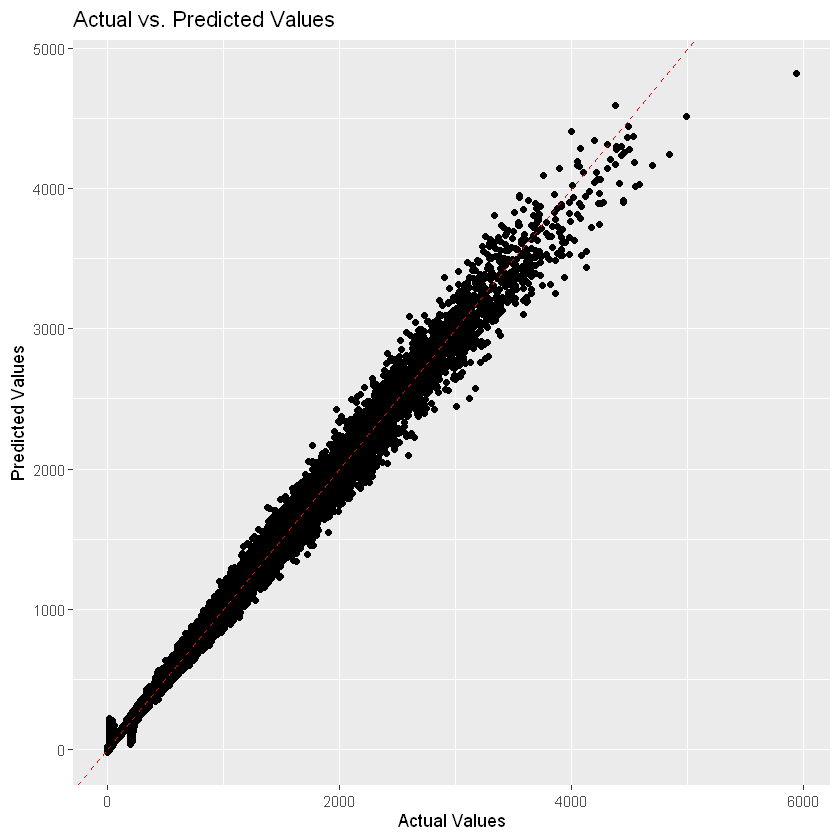

In [189]:

# Create a data frame for plotting
plot_data <- data.frame(
  Actual = actual_values,
  Predicted = predicted_values
)

# Plot actual vs. predicted values
ggplot(plot_data, aes(x = Actual, y = Predicted)) +
  geom_point() +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "red") +
  labs(title = "Actual vs. Predicted Values",
       x = "Actual Values",
       y = "Predicted Values")


# <font color = lime> Save best_model to models folder 

In [ ]:
# Check if H2O is initialized
# h2o.is_running()


In [164]:
# Get the best model from the AutoML object
best_model_r13 <- h2o.get_best_model(aml)

# Save the model to a file
model_path <- h2o.save_model(best_model_r13, path = "C:/all_kaggle/jan25/models", force = TRUE)
print(model_path)


ERROR: Error in h2o.save_model(best_model_r13, path = "C:/all_kaggle/jan25/models", : could not find function "h2o.save_model"


In [ ]:
stopper

In [ ]:
# Load the h2o package and initialize the H2O cluster if not already done

# Define the path to the /models folder
models_path <- "C:/all_kaggle/jan25/models"

# Save the best model to the specified path with the designated name
model_path <- h2o.saveModel(object = best_model, path = models_path, force = TRUE)

# Rename the saved model file
file.rename(from = model_path, to = file.path(models_path, "kaggle_best_model1"))

# Confirmation message
cat("The best model has been saved as kaggle_best_model1 in the /models folder.")



# <font color = lime> Evaluate the test dataset with the best_model

## <font color = yellow> Get test dataset

In [ ]:
testing 

In [ ]:
glimpse(testing)
summary(testing)

# <font color = yellow> Prepare Testing Dataset:

### Convert all features to numeric data types

### <font color = yellow> Review for NAs  (if NA's exist)

#### Likely no NA's since the NAs in the train dataset were only found in the response var (num_sold)

In [ ]:
sum(is.na(testing))

In [ ]:
head(testing,2)

In [ ]:
str(predictions$predict)  # an instance of h2oFrame object  ... ugly 

# <font color = lime> Data Ready: Fork in Road

### <font color = yellow> 